# Problem Statement

This assignment is a programming assignment wherein I have to build a multiple linear regression model for the prediction of car prices.

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted my company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, my company has gathered a large dataset of different types of cars across the American market.

## Business Goal 

I am required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing numpy and pandas library
import numpy as np
import pandas as pd

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 500

In [3]:
# importing the data and the data dictionary.

data = pd.read_csv("CarPrice_Assignment.csv")
dic = pd.read_excel (r'C:\Users\rachit\Downloads\Assignment- Linear Regression\Data Dictionary - carprices.xlsx')

In [4]:
# dropping rows with Nan Values in data dictionary
dic = dic.drop([0,1,2,29,30])

In [5]:
# dropping columns with NaN values in data dictionary

dic = dic.drop(dic.ix[:, 0:7].columns, axis = 1)
dic = dic.drop(dic.ix[:, 1:4].columns, axis = 1)
dic = dic.drop(dic.ix[:, 2:].columns, axis = 1)

# Renaming columns of dictionary to make more sense.
dic.rename(columns = {'Unnamed: 7':'ColumnName', 'Unnamed: 11' : 'Description'}, inplace = True)

### Data Dictionary
Below mentioned are the details of the columns being used in the data set of this assignment.

In [6]:
# Reset index of dictionary dataframe
dic.reset_index()

,index,ColumnName,Description
0,3,Car_ID,Unique id of each observation (Interger)
1,4,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,5,carCompany,Name of car company (Categorical)
3,6,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,7,aspiration,Aspiration used in a car (Categorical)
5,8,doornumber,Number of doors in a car (Categorical)
6,9,carbody,body of car (Categorical)
7,10,drivewheel,type of drive wheel (Categorical)
8,11,enginelocation,Location of car engine (Categorical)
9,12,wheelbase,Weelbase of car (Numeric)


In [7]:
# checking data
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# dropping the car_ID column as it is of no use.
data = data.drop(data.columns[[0]], axis=1)

In [9]:
# shape of data
data.shape

(205, 25)

In [10]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

So there are no NaN values in the data set and we can proceed further.

In [11]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data
We will visalize the data for multicollinearity and to identify if some predictors directly have a strong association with the outcome variable.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

#### Visualising Numeric Variables

Let's divide the dataset in categorical and numerical datasets and then perform analytics. The variables are too many in number so it won't be feasible to just go for the pair / box plots.

We will divide the data set in categorical and numerical dataset with key attribute as "CarName", which will be present in both the datasets.

In [13]:
data.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# adding 2 new cols on the basis of car name for more details
# new data frame with split value columns 
new = data["CarName"].str.split(" ", n = 1, expand = True) 
  
# making separate carMaker column from new data frame 
data["carMaker"]= new[0] 
  
# making separate carModel column from new data frame 
data["carModel"]= new[1] 
  
# Dropping old CarName column 
data.drop(columns =["CarName"], inplace = True)

# dealing with column carMaker for data discrepancy.
data.set_value(50, 'carMaker', 'mazda')
data.set_value(51, 'carMaker', 'mazda')
data.set_value(89, 'carMaker', 'nissan')
data.set_value(126, 'carMaker', 'porsche')
data.set_value(181, 'carMaker', 'toyota')
data.set_value(182, 'carMaker', 'volkswagen')
data.set_value(189, 'carMaker', 'volkswagen')
data.set_value(190, 'carMaker', 'volkswagen')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carMaker,carModel
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi,100ls
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi,fox
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi,100ls
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi,5000
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi,4000
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi,5000s (diesel)


In [15]:
# creating a data set of numerical variables
data_num = data[['carMaker', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                'citympg', 'highwaympg', 'price']]

In [16]:
# creating a data set of categorical variables
data_cat = data[['carMaker','symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
                 'price']]

In [17]:
data_num

,carMaker,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,13495.000
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,16500.000
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.470,9.00,154,5000,19,26,16500.000
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,13950.000
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.400,8.00,115,5500,18,22,17450.000
5,audi,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.50,110,5500,19,25,15250.000
6,audi,105.8,192.7,71.4,55.7,2844,136,3.19,3.400,8.50,110,5500,19,25,17710.000
7,audi,105.8,192.7,71.4,55.7,2954,136,3.19,3.400,8.50,110,5500,19,25,18920.000
8,audi,105.8,192.7,71.4,55.9,3086,131,3.13,3.400,8.30,140,5500,17,20,23875.000
9,audi,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22,17859.167


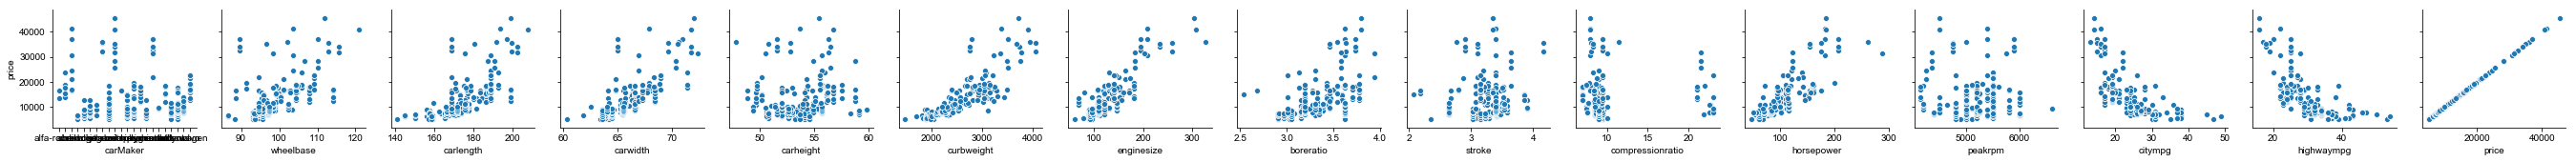

In [18]:
# lets create pairplots for the num variables against column price.
# price is chosen as the whole model building is about the pricing of car.
sns.pairplot(data=data_num, x_vars = data_num.columns, y_vars=['price'])
sns.set(rc={'figure.figsize':(60,4)})
plt.show()
# Please zoom into the below image if its small, it worked on my laptop.

from the above graphs we can see that 'carwidth', 'curbweight', 'enginesize' and 'horsepower' are corelated while peakrpm is behaving like a categorical data.

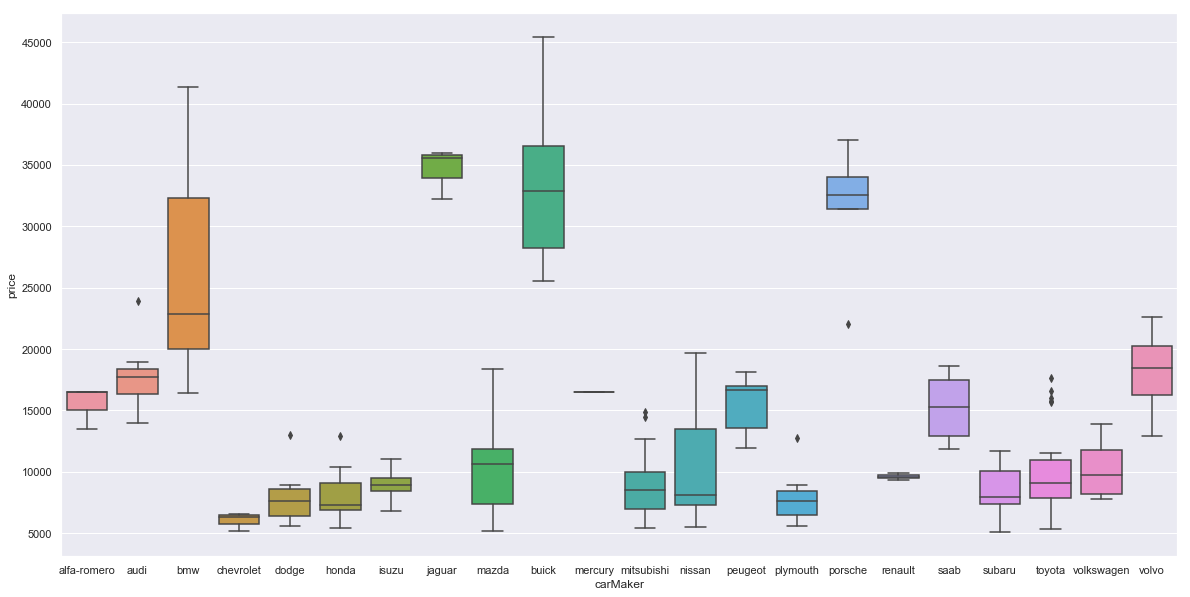

In [19]:
sns.boxplot(x = 'carMaker', y = 'price', data = data_num)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [20]:
data_cat

,carMaker,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.000
1,alfa-romero,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.000
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.000
3,audi,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.000
4,audi,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.000
5,audi,2,gas,std,two,sedan,fwd,front,ohc,five,mpfi,15250.000
6,audi,1,gas,std,four,sedan,fwd,front,ohc,five,mpfi,17710.000
7,audi,1,gas,std,four,wagon,fwd,front,ohc,five,mpfi,18920.000
8,audi,1,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,23875.000
9,audi,0,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,17859.167


### Step 3: Data Preparation

I will be converting the categorical variables into dummy variables so that their values can be put into 0 or 1 and they will make more sense in creating the regression.

In [21]:
# Now, according to the above categorical data set "symboling" which is related to the riskiness
# of the vehicle (higher value shows more risk) is already converted to numerical values.
# We will try to convert other variables to dummy variables for their conversion to numeric values.

# Lets consider fueltype here and convert it into dummy variables.

# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel'

fuel = pd.get_dummies(data_cat['fueltype'])

# dropping the fueltype column as it is of no use now.
data_cat.drop(['fueltype'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, fuel], axis = 1)

# we see diesel and gas as 2 columns where 1 represents their presence and 0 doesn't. Removing
# one of them is a good idea as 0 will represent the value of the other.
data_cat.drop(['gas'], axis = 1, inplace = True)

# now we have one column diesel where 0 represents gas/petrol and 1 represents diesel.

In [22]:
# Similarly I will go ahead with the feature "aspiration".

# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'aspi'

aspi = pd.get_dummies(data_cat['aspiration'])

# dropping the fueltype column as it is of no use now.
data_cat.drop(['aspiration'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, aspi], axis = 1)

# Dropping std column as 0 will represent that in column turbo
data_cat.drop(['std'], axis = 1, inplace = True)

In [23]:
# Similarly I will go ahead with the feature "doornumber".

# Get the dummy variables for the feature 'doornumber' and store it in a new variable - 'doors'

doors = pd.get_dummies(data_cat['doornumber'])

# dropping the fueltype column as it is of no use now.
data_cat.drop(['doornumber'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, doors], axis = 1)

# Dropping two column as 0 will represent that in column four
data_cat.drop(['two'], axis = 1, inplace = True)

# Renaming column four to "4-Doors" as it will make more sense.
data_cat.rename(columns = {'four':'4-Doors'}, inplace = True)

In [24]:
# Similarly I will go ahead with the feature "carbody".

# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'body'

body = pd.get_dummies(data_cat['carbody'])

# dropping the carbody column as it is of no use now.
data_cat.drop(['carbody'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, body], axis = 1)

# Dropping sedan column as all 0 in other body type columns will represent that.
data_cat.drop(['sedan'], axis = 1, inplace = True)

In [25]:
# Similarly I will go ahead with the feature "drivewheel".

# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel'

drivewheel = pd.get_dummies(data_cat['drivewheel'])

# dropping the carbody column as it is of no use now.
data_cat.drop(['drivewheel'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, drivewheel], axis = 1)

# Dropping fwd column as all 0 in other drive wheel columns will represent that.
data_cat.drop(['fwd'], axis = 1, inplace = True)

In [26]:
# Similarly I will go ahead with the feature "enginelocation".

# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'eloc'

eloc = pd.get_dummies(data_cat['enginelocation'])

# dropping the fueltype column as it is of no use now.
data_cat.drop(['enginelocation'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, eloc], axis = 1)

# Dropping front column as 0 will represent that in column rear
data_cat.drop(['front'], axis = 1, inplace = True)

# Renaming column rear to "rearEng" as it will make more sense.
data_cat.rename(columns = {'rear':'rearEng'}, inplace = True)

In [27]:
# Similarly I will go ahead with the feature "enginetype".

# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'engtype'

engtype = pd.get_dummies(data_cat['enginetype'])

# dropping the fueltype column as it is of no use now.
data_cat.drop(['enginetype'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, engtype], axis = 1)

# Dropping ohc column as all other engine type columns with 0 will represent that.
data_cat.drop(['ohc'], axis = 1, inplace = True)

In [28]:
# Similarly I will go ahead with the feature "fuelsystem".

# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fsys'

fsys = pd.get_dummies(data_cat['fuelsystem'])

# dropping the fuelsystem column as it is of no use now.
data_cat.drop(['fuelsystem'], axis = 1, inplace = True)

# Add the results to the original data_cat dataframe
data_cat = pd.concat([data_cat, fsys], axis = 1)

# Dropping mpfi column as all other fuel system type columns with 0 will represent that.
data_cat.drop(['mpfi'], axis = 1, inplace = True)

In [29]:
# Converting 'cylindernumber' to numerical variable. As this variable is really significant. 
# I studied that more the number of cylinders more power the engine generates.
var =  ['cylindernumber']

# Defining the map function
def num_map(x):
    return x.map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12 })

# Applying the function to the housing list
data_cat[var] = data_cat[var].apply(num_map)

# Renaming column cylindernumber to "cylinders" as it will make more sense.
data_cat.rename(columns = {'cylindernumber':'cylinders'}, inplace = True)

data_cat

,carMaker,symboling,cylinders,price,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
0,alfa-romero,3,4,13495.000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,alfa-romero,3,4,16500.000,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,alfa-romero,1,6,16500.000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,audi,2,4,13950.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,audi,2,5,17450.000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,audi,2,5,15250.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,audi,1,5,17710.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,audi,1,5,18920.000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,audi,1,5,23875.000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,audi,0,5,17859.167,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Creating the required dataframes
# We have data_num as the numerical dataframe and data_cat as the categorical dataframe.
# Lets create a dataframe with all the variables combined and no repetition.

# Renaming column symboling to "risk" as it will make more sense. Also I am keeping this variable as
# the numerical variable and not categorical as its the insurance risk involved with the car.
data_cat.rename(columns = {'symboling':'risk'}, inplace = True)

# dropping common columns from data_cat
# making a copy of data_cat called data_Ocat 
data_Ocat = data_cat.copy() 

# Dropping carMaker and price column
data_Ocat.drop(['carMaker', 'price'], axis = 1, inplace = True)

# Add the results of data_Ocat to the original data_num dataframe
data_full = pd.concat([data_num, data_Ocat], axis = 1)


In [31]:
data_full.shape

(205, 40)

In [32]:
data_full.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk,cylinders,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.834146,4.380488,0.097561,0.180488,0.560976,0.029268,0.039024,0.341463,0.121951,0.043902,0.370732,0.014634,0.058537,0.004878,0.058537,0.073171,0.063415,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,1.245307,1.080854,0.297446,0.385535,0.497483,0.168970,0.194127,0.475361,0.328031,0.205380,0.484183,0.120377,0.235330,0.069843,0.235330,0.261054,0.244304,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# dropping the column 'carMaker' as it makes no sense to keep with all numerical variables.
data_full.drop(['carMaker'], axis = 1, inplace = True)

In [34]:
data_full

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk,cylinders,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,13495.000,3,4,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,16500.000,3,4,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.470,9.00,154,5000,19,26,16500.000,1,6,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,13950.000,2,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.400,8.00,115,5500,18,22,17450.000,2,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.50,110,5500,19,25,15250.000,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.400,8.50,110,5500,19,25,17710.000,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.400,8.50,110,5500,19,25,18920.000,1,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.400,8.30,140,5500,17,20,23875.000,1,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22,17859.167,0,5,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_full, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Scaling doesn't impact our model. Here we can see that except for `price`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# I am adding risk and cylinders as numeric (as they are numbers and might be a good choice)
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 
           'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
           'highwaympg', 'price', 'risk', 'cylinders']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\rachit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
df_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk,cylinders,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.150000,0.083333,0.551020,0.500000,0.567568,0.068818,0.6,0.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.156250,0.395833,0.551020,0.166667,0.270270,0.466890,1.0,0.2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324,0.122110,0.6,0.2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.125000,0.262500,0.346939,0.222222,0.270270,0.314446,1.0,0.2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.031250,0.475000,0.387755,0.111111,0.135135,0.382131,0.2,0.2,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190,0.272414,0.400000,0.308333,0.318584,0.284329,0.181132,0.404762,0.611111,0.093750,0.175000,0.551020,0.305556,0.324324,0.134321,1.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0.272414,0.393496,0.291667,0.592920,0.187355,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.065779,0.6,0.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
177,0.544828,0.560976,0.516667,0.539823,0.376261,0.230189,0.500000,0.681818,0.106250,0.183333,0.020408,0.388889,0.405405,0.169351,0.2,0.2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181,0.617241,0.759350,0.516667,0.557522,0.645074,0.377358,0.468254,0.585859,0.137500,0.450000,0.428571,0.166667,0.189189,0.293726,0.2,0.4,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
97,0.272414,0.473171,0.291667,0.504425,0.212956,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541,0.079592,0.6,0.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk,cylinders,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.559441,0.240559,0.090909,0.181818,0.559441,0.027972,0.020979,0.342657,0.132867,0.055944,0.349650,0.006993,0.069930,0.006993,0.062937,0.083916,0.062937,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.239200,0.115818,0.288490,0.387050,0.498199,0.165472,0.143818,0.476266,0.340624,0.230621,0.478536,0.083624,0.255926,0.083624,0.243703,0.278236,0.243703,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.600000,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.600000,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [39]:
# From the above description we can see that mfi and spfi has zero values as mean, min and max.
# So I am removing them.They are of no use in our analytics.
df_train.drop(['mfi', 'spfi'], axis = 1, inplace = True)

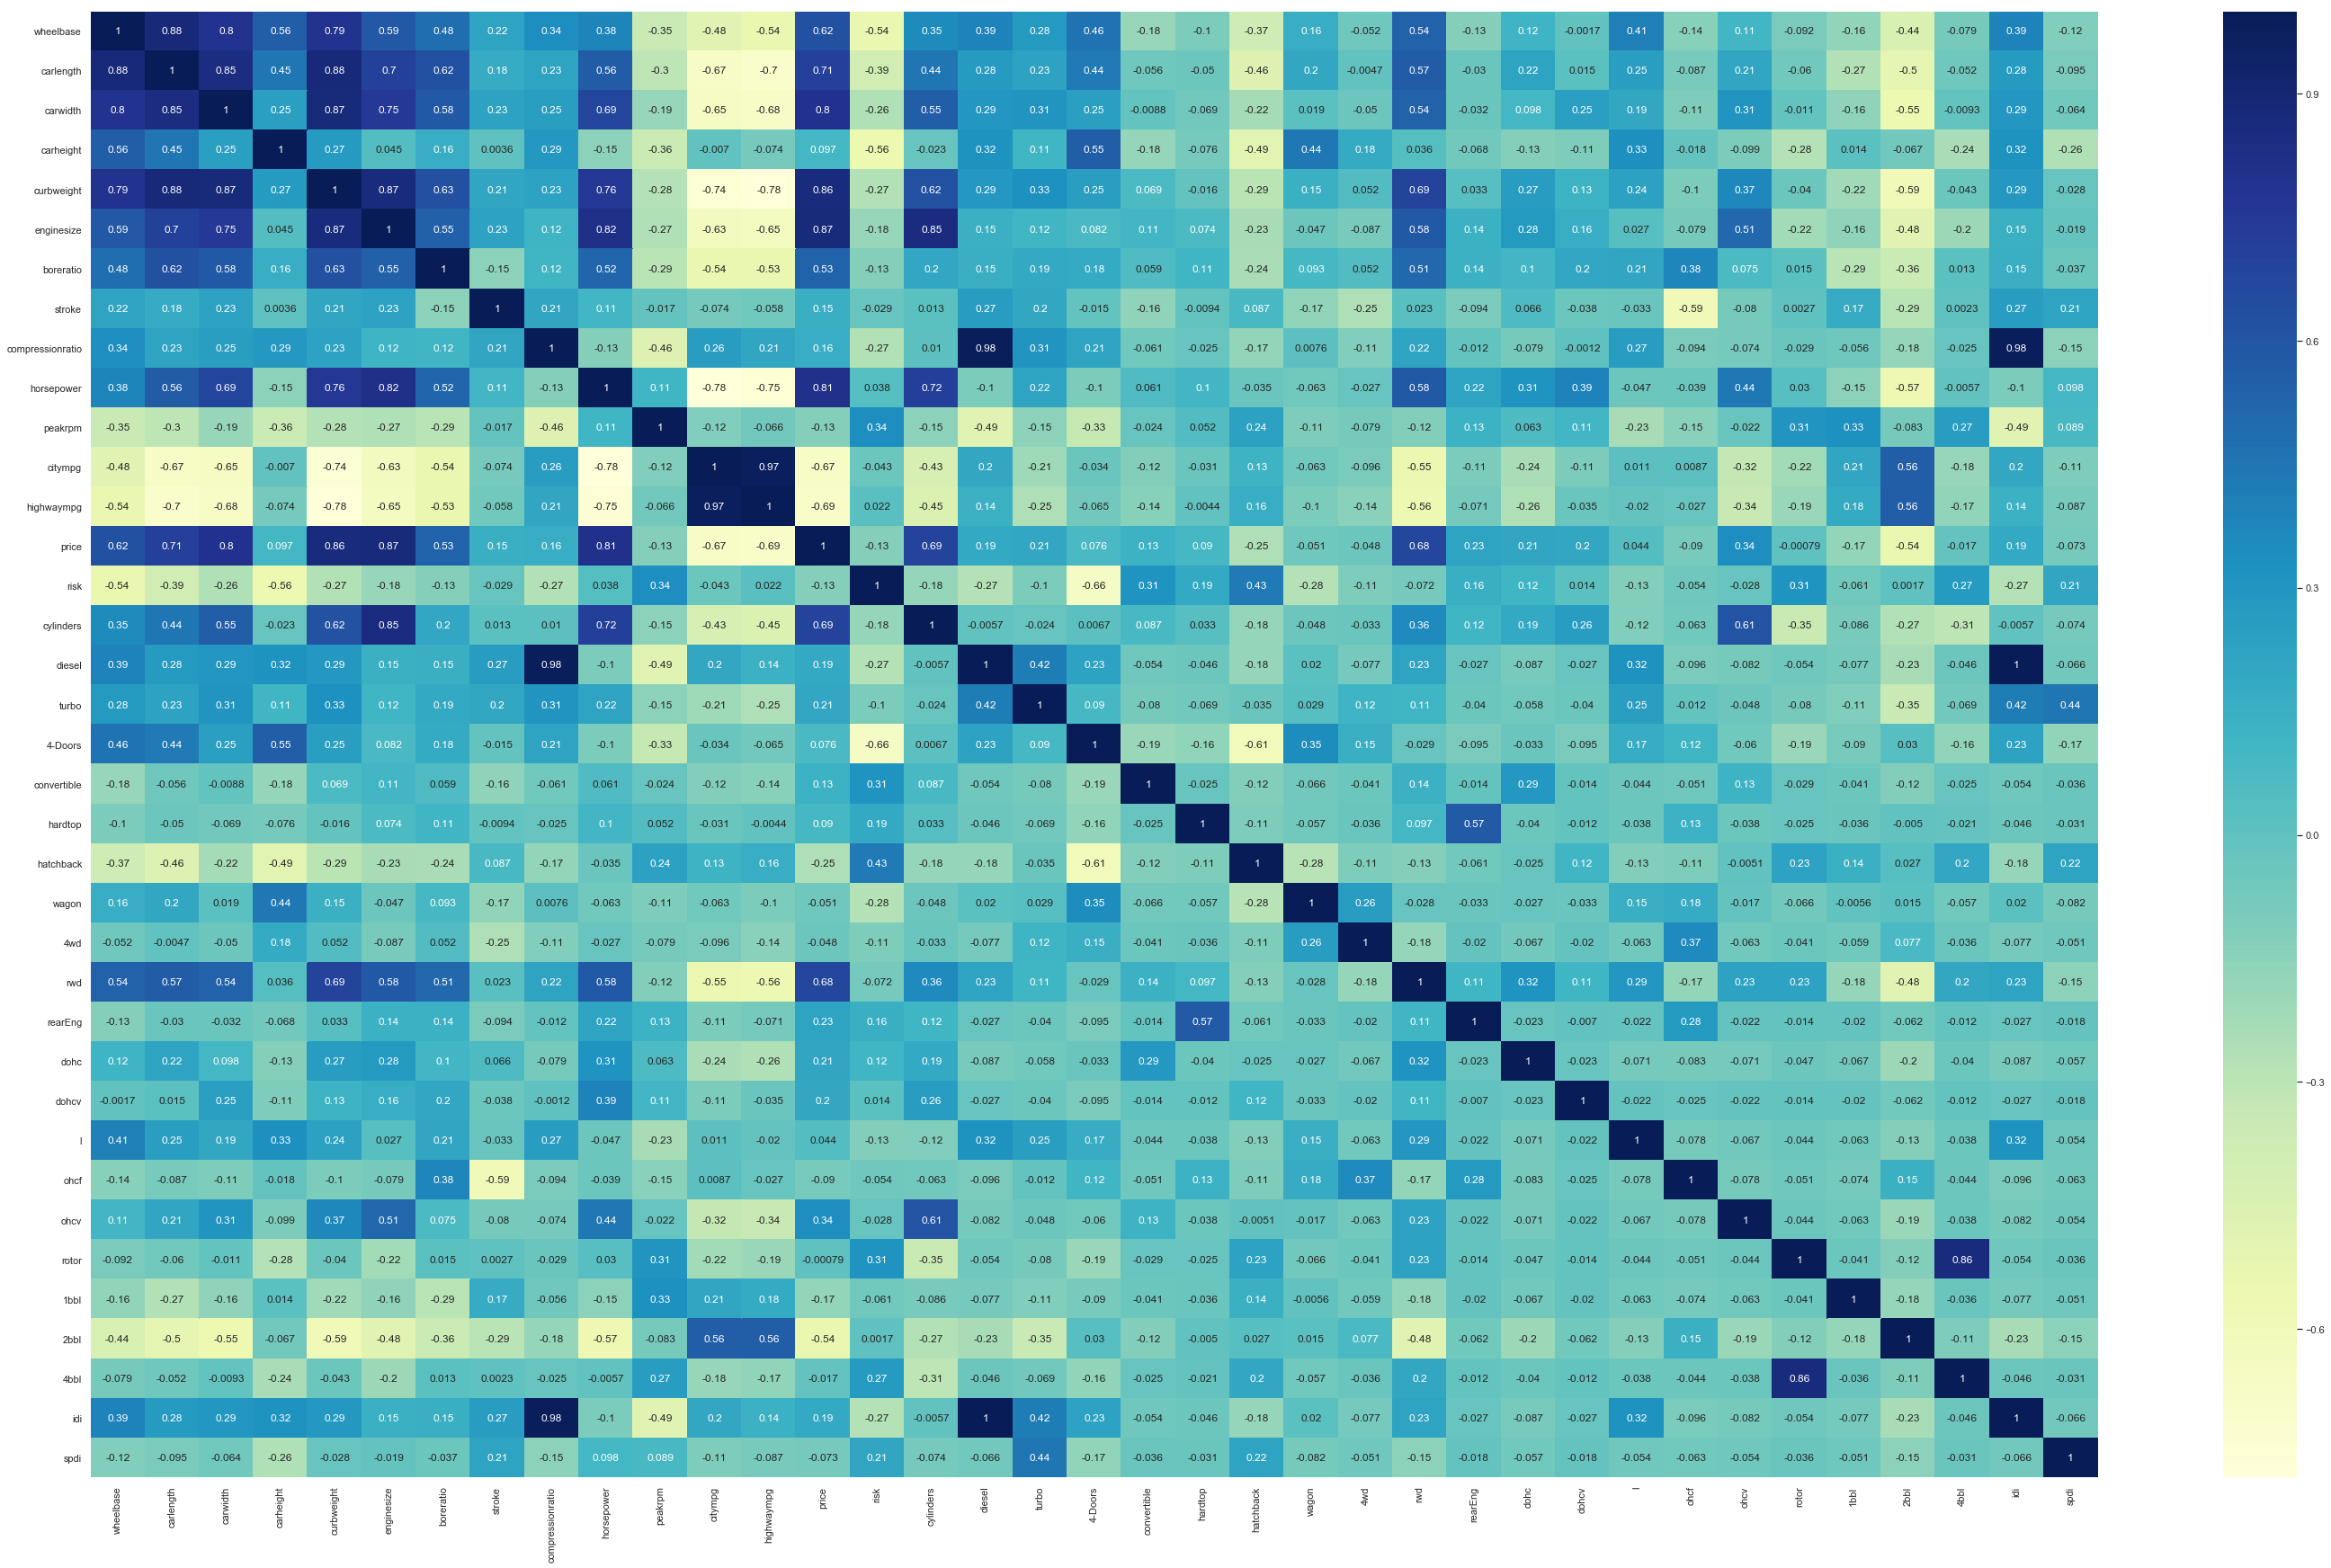

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heatmap, enginesize seems to be most correlated with price. Let's see a pairplot for 
#### enginesize vs price.

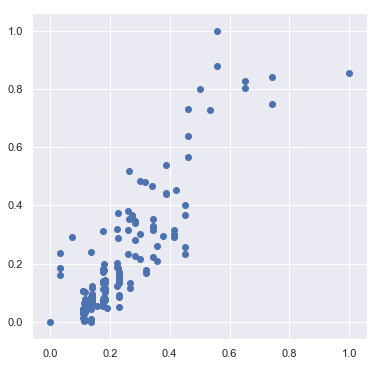

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(x = df_train.enginesize, y = df_train.price)
plt.show()

So, we pick enginesize as the first variable and we'll try to fit a regression line to that.

#### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Now we will fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [43]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Check the parameters obtained
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

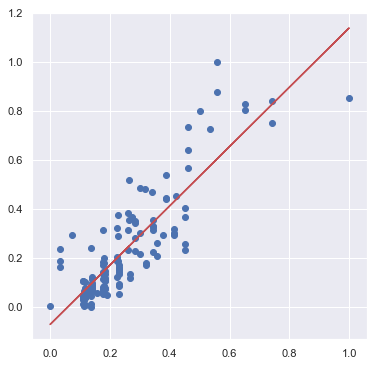

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.073 + 1.211*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [46]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.09e-44
Time:                        13:34:49   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `curbweight`.

In [47]:
# Assigning another feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [48]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [49]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.31e-50
Time:                        13:34:50   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.802 from 0.753. Let's go ahead and add another variable, horsepower.

In [50]:
# Assigning another feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight', 'horsepower']]

In [51]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [52]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.16e-51
Time:                        13:34:50   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [53]:
# Check all the columns of the dataframe

data_full.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'risk', 'cylinders',
       'diesel', 'turbo', '4-Doors', 'convertible', 'hardtop', 'hatchback',
       'wagon', '4wd', 'rwd', 'rearEng', 'dohc', 'dohcv', 'l', 'ohcf', 'ohcv',
       'rotor', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'spdi', 'spfi'],
      dtype='object')

In [54]:
# Assigning all the feature variables to X
X_train_lm = X_train[['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'risk',
       'cylinders', 'diesel', 'turbo', '4-Doors', 'convertible', 'hardtop',
       'hatchback', 'wagon', '4wd', 'rwd', 'rearEng', 'dohc', 'dohcv', 'l',
       'ohcf', 'ohcv', 'rotor', '1bbl', '2bbl', '4bbl', 'idi', 'spdi']]

In [55]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              -0.061949
wheelbase           0.126351
carlength          -0.019315
carwidth            0.196656
carheight           0.093946
curbweight          0.156158
enginesize          1.615657
boreratio          -0.363095
stroke             -0.363441
compressionratio   -0.344008
horsepower          0.223206
peakrpm             0.123307
citympg            -0.041988
highwaympg          0.270935
risk                0.064345
cylinders          -0.672919
diesel              0.134511
turbo               0.051433
4-Doors             0.003021
convertible         0.115270
hardtop            -0.044587
hatchback          -0.013976
wagon              -0.021675
4wd                 0.010053
rwd                 0.075037
rearEng             0.231015
dohc               -0.140104
dohcv               0.069826
l                  -0.146701
ohcf                0.003458
ohcv               -0.178684
rotor               0.137566
1bbl               -0.020806
2bbl               -0.004612
4bbl          

In [56]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.56e-47
Time:                        13:34:50   Log-Likelihood:                 206.12
No. Observations:                 143   AIC:                            -340.2
Df Residuals:                     107   BIC:                            -233.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0619      0.145  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,diesel,inf
34,idi,inf
5,enginesize,253.92
8,compressionratio,210.60
12,highwaympg,192.73
4,curbweight,185.28
11,citympg,178.11
1,carlength,138.44
14,cylinders,137.51
9,horsepower,85.43


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As I can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `4bbl` as it has a very high p-value of `0.958`. Let's go ahead and drop this variable.

In [59]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('4bbl', 1,)

In [60]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     41.59
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.00e-48
Time:                        13:34:50   Log-Likelihood:                 206.12
No. Observations:                 143   AIC:                            -342.2
Df Residuals:                     108   BIC:                            -238.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0622      0.144  

In [62]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,idi,inf
15,diesel,inf
5,enginesize,253.91
8,compressionratio,209.72
12,highwaympg,192.33
4,curbweight,185.20
11,citympg,177.99
1,carlength,138.36
14,cylinders,134.82
0,wheelbase,82.88


In [63]:
# Dropping highly correlated variables and insignificant variables, here ohcf as its p value is high.
X = X.drop('ohcf', 1)

In [64]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     43.25
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.06e-48
Time:                        13:34:50   Log-Likelihood:                 206.11
No. Observations:                 143   AIC:                            -344.2
Df Residuals:                     109   BIC:                            -243.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0592      0.138  

In [66]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,idi,inf
15,diesel,inf
5,enginesize,224.49
8,compressionratio,200.08
12,highwaympg,184.93
4,curbweight,184.81
11,citympg,169.51
1,carlength,133.40
14,cylinders,113.53
2,carwidth,82.82


In [67]:
X = X.drop('4-Doors', 1)

In [68]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     45.00
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.58e-49
Time:                        13:34:51   Log-Likelihood:                 206.10
No. Observations:                 143   AIC:                            -346.2
Df Residuals:                     110   BIC:                            -248.4
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0556      0.135  

In [70]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,idi,inf
15,diesel,inf
5,enginesize,211.19
8,compressionratio,200.00
12,highwaympg,177.97
4,curbweight,175.56
11,citympg,166.27
1,carlength,133.40
14,cylinders,111.32
2,carwidth,82.43


In [71]:
X = X.drop('carlength', 1)

In [72]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.85
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.32e-50
Time:                        13:34:51   Log-Likelihood:                 206.08
No. Observations:                 143   AIC:                            -348.2
Df Residuals:                     111   BIC:                            -253.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0585      0.134  

In [74]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,idi,inf
14,diesel,inf
7,compressionratio,197.48
4,enginesize,187.63
11,highwaympg,175.68
10,citympg,159.98
3,curbweight,155.65
13,cylinders,106.19
8,horsepower,78.47
1,carwidth,73.77


In [75]:
X = X.drop('citympg', 1)

In [76]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     48.83
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.35e-51
Time:                        13:34:51   Log-Likelihood:                 206.05
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     112   BIC:                            -258.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0592      0.133  

In [78]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,idi,inf
13,diesel,inf
7,compressionratio,196.80
4,enginesize,181.52
3,curbweight,148.89
12,cylinders,106.16
8,horsepower,76.06
1,carwidth,73.54
0,wheelbase,72.34
6,stroke,36.31


In [79]:
# As we know that idi and diesel has infinity vif, we must remove them now.
X = X.drop('idi', 1)
X = X.drop('diesel', 1)

In [80]:
# Build a Seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     50.15
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.07e-51
Time:                        13:34:51   Log-Likelihood:                 204.97
No. Observations:                 143   AIC:                            -349.9
Df Residuals:                     113   BIC:                            -261.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0588      0.134  

In [82]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,164.30
3,curbweight,147.21
12,cylinders,81.47
8,horsepower,76.06
1,carwidth,73.32
0,wheelbase,71.90
6,stroke,36.22
5,boreratio,29.11
10,highwaympg,25.09
2,carheight,24.51


In [83]:
X = X.drop('2bbl', 1)

In [84]:
# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     52.31
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.59e-52
Time:                        13:34:52   Log-Likelihood:                 204.86
No. Observations:                 143   AIC:                            -351.7
Df Residuals:                     114   BIC:                            -265.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0752      0.127  

In [86]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,163.17
3,curbweight,146.92
12,cylinders,77.30
1,carwidth,73.22
0,wheelbase,70.40
8,horsepower,62.87
6,stroke,36.21
5,boreratio,28.70
2,carheight,24.47
10,highwaympg,22.72


In [87]:
X = X.drop('1bbl', 1)

In [88]:
# Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     54.52
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.58e-53
Time:                        13:34:52   Log-Likelihood:                 204.62
No. Observations:                 143   AIC:                            -353.2
Df Residuals:                     115   BIC:                            -270.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0756      0.127  

In [90]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,154.97
3,curbweight,145.20
12,cylinders,76.74
1,carwidth,72.44
0,wheelbase,67.62
8,horsepower,61.80
6,stroke,36.16
5,boreratio,28.23
2,carheight,23.31
10,highwaympg,22.66


In [91]:
X = X.drop('4wd', 1)

In [92]:
# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     56.90
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.08e-54
Time:                        13:34:52   Log-Likelihood:                 204.38
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     116   BIC:                            -274.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0646      0.125  

In [94]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,145.52
3,curbweight,116.89
1,carwidth,71.13
12,cylinders,70.52
0,wheelbase,63.58
8,horsepower,60.79
6,stroke,36.12
5,boreratio,27.23
2,carheight,23.22
10,highwaympg,22.45


In [95]:
X = X.drop('dohcv', 1)

In [96]:
# Build a eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     59.39
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.83e-55
Time:                        13:34:52   Log-Likelihood:                 204.04
No. Observations:                 143   AIC:                            -356.1
Df Residuals:                     117   BIC:                            -279.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1065      0.112  

In [98]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,128.90
3,curbweight,116.50
1,carwidth,69.12
12,cylinders,69.11
0,wheelbase,62.62
8,horsepower,39.41
6,stroke,35.91
5,boreratio,27.07
2,carheight,23.10
10,highwaympg,22.43


In [99]:
X = X.drop('compressionratio', 1)

In [100]:
# Build a 12 fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     62.11
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.09e-55
Time:                        13:34:52   Log-Likelihood:                 203.74
No. Observations:                 143   AIC:                            -357.5
Df Residuals:                     118   BIC:                            -283.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0677      0.097     -0.701      

In [102]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,126.48
3,curbweight,114.49
11,cylinders,68.90
1,carwidth,65.56
0,wheelbase,61.37
7,horsepower,35.85
6,stroke,35.70
5,boreratio,26.32
2,carheight,23.10
9,highwaympg,18.53


In [103]:
X = X.drop('hatchback', 1)

In [104]:
# Build a 13th fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [105]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     64.74
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.22e-56
Time:                        13:34:53   Log-Likelihood:                 203.11
No. Observations:                 143   AIC:                            -358.2
Df Residuals:                     119   BIC:                            -287.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0774      0.096     -0.804      

In [106]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,121.84
3,curbweight,114.39
11,cylinders,68.72
1,carwidth,65.52
0,wheelbase,61.34
7,horsepower,35.25
6,stroke,34.74
5,boreratio,26.27
2,carheight,21.92
9,highwaympg,18.38


In [107]:
X = X.drop('hardtop', 1)

In [108]:
# Build a 14th fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [109]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     67.70
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.17e-57
Time:                        13:34:53   Log-Likelihood:                 202.57
No. Observations:                 143   AIC:                            -359.1
Df Residuals:                     120   BIC:                            -291.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0703      0.096     -0.733      

In [110]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,121.84
3,curbweight,114.26
11,cylinders,68.62
1,carwidth,64.88
0,wheelbase,60.87
7,horsepower,35.20
6,stroke,34.60
5,boreratio,26.22
2,carheight,21.87
9,highwaympg,18.37


In [111]:
X = X.drop('wagon', 1)

In [112]:
# Build a 15 fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [113]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     70.75
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           8.78e-58
Time:                        13:34:53   Log-Likelihood:                 201.86
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     121   BIC:                            -294.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0676      0.096     -0.705      

In [114]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,enginesize,116.06
3,curbweight,97.18
11,cylinders,67.49
1,carwidth,63.45
0,wheelbase,59.28
7,horsepower,35.07
6,stroke,34.59
5,boreratio,25.92
2,carheight,20.92
9,highwaympg,18.33


In [115]:
X = X.drop('curbweight', 1)

In [116]:
# Build a 16 fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [117]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     74.27
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.60e-58
Time:                        13:34:53   Log-Likelihood:                 201.30
No. Observations:                 143   AIC:                            -360.6
Df Residuals:                     122   BIC:                            -298.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0372      0.091     -0.410      

In [118]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,99.61
10,cylinders,67.24
1,carwidth,59.02
0,wheelbase,57.69
6,horsepower,34.67
5,stroke,34.53
4,boreratio,25.81
8,highwaympg,17.46
2,carheight,17.32
9,risk,12.75


In [119]:
X = X.drop('risk', 1)

In [120]:
# Build a 17 fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [121]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     77.23
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.58e-59
Time:                        13:34:53   Log-Likelihood:                 199.95
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     123   BIC:                            -300.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0202      0.083      0.244      

In [122]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,96.98
9,cylinders,62.93
1,carwidth,57.61
0,wheelbase,52.33
6,horsepower,34.49
5,stroke,31.33
4,boreratio,23.22
8,highwaympg,17.43
2,carheight,17.31
7,peakrpm,10.63


In [123]:
X = X.drop('wheelbase', 1)

In [124]:
# Build a 18 fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [125]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     81.45
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.00e-59
Time:                        13:34:53   Log-Likelihood:                 199.37
No. Observations:                 143   AIC:                            -360.7
Df Residuals:                     124   BIC:                            -304.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0376      0.081      0.463      

In [126]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,89.68
8,cylinders,62.92
0,carwidth,34.05
4,stroke,31.25
5,horsepower,27.27
3,boreratio,23.14
7,highwaympg,16.52
1,carheight,11.62
6,peakrpm,10.39
11,rwd,4.14


In [127]:
X = X.drop('spdi', 1)

In [128]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()

In [129]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     85.08
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.62e-60
Time:                        13:34:54   Log-Likelihood:                 197.94
No. Observations:                 143   AIC:                            -359.9
Df Residuals:                     125   BIC:                            -306.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0162      0.080      0.202      

In [130]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,89.68
8,cylinders,62.63
0,carwidth,32.16
4,stroke,29.65
5,horsepower,27.26
3,boreratio,22.58
7,highwaympg,16.28
1,carheight,11.02
6,peakrpm,10.30
11,rwd,4.03


In [131]:
X = X.drop('rearEng', 1)

In [132]:
# Build a 20 fitted model
X_train_lm = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm).fit()

In [133]:
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     87.58
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.61e-60
Time:                        13:34:54   Log-Likelihood:                 195.34
No. Observations:                 143   AIC:                            -356.7
Df Residuals:                     126   BIC:                            -306.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0290      0.081      0.357      

In [134]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,83.48
8,cylinders,60.52
0,carwidth,29.74
4,stroke,28.28
5,horsepower,26.16
3,boreratio,22.30
7,highwaympg,15.78
1,carheight,10.78
6,peakrpm,9.88
11,rwd,4.03


In [135]:
X = X.drop('turbo', 1)


In [136]:
# Build a 21 fitted model
X_train_lm = sm.add_constant(X)

lr_21 = sm.OLS(y_train, X_train_lm).fit()

In [137]:
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.48e-60
Time:                        13:34:54   Log-Likelihood:                 192.07
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     127   BIC:                            -304.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0783      0.080      0.974      

In [138]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,76.87
8,cylinders,60.45
0,carwidth,28.51
4,stroke,25.80
5,horsepower,22.70
3,boreratio,22.24
7,highwaympg,15.64
1,carheight,10.77
6,peakrpm,9.04
10,rwd,4.03


In [139]:
X = X.drop('rotor', 1)

In [140]:
# Build a 22 fitted model
X_train_lm = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm).fit()

In [141]:
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.25
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.89e-60
Time:                        13:34:54   Log-Likelihood:                 190.38
No. Observations:                 143   AIC:                            -350.8
Df Residuals:                     128   BIC:                            -306.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1289      0.076      1.706      

In [142]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,72.84
8,cylinders,59.81
0,carwidth,27.47
4,stroke,24.88
5,horsepower,22.63
3,boreratio,21.96
7,highwaympg,15.57
1,carheight,10.32
6,peakrpm,8.82
10,rwd,3.29


In [143]:
X = X.drop('peakrpm', 1)

In [144]:
# Build a 23 fitted model
X_train_lm = sm.add_constant(X)

lr_23 = sm.OLS(y_train, X_train_lm).fit()

In [145]:
print(lr_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     99.67
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.27e-60
Time:                        13:34:54   Log-Likelihood:                 188.68
No. Observations:                 143   AIC:                            -349.4
Df Residuals:                     129   BIC:                            -307.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1793      0.070      2.548      

In [146]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylinders,54.06
2,enginesize,47.21
0,carwidth,27.42
3,boreratio,20.96
4,stroke,20.01
5,horsepower,18.83
6,highwaympg,15.57
1,carheight,10.28
9,rwd,3.28
12,ohcv,2.01


In [147]:
X = X.drop('highwaympg', 1)

In [148]:
# Build a 24 fitted model
X_train_lm = sm.add_constant(X)

lr_24 = sm.OLS(y_train, X_train_lm).fit()

In [149]:
print(lr_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.51e-61
Time:                        13:34:54   Log-Likelihood:                 186.64
No. Observations:                 143   AIC:                            -347.3
Df Residuals:                     130   BIC:                            -308.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2203      0.068      3.250      

In [150]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.33
2,enginesize,25.28
6,cylinders,21.33
5,horsepower,13.44
3,boreratio,11.94
1,carheight,9.88
4,stroke,8.39
8,rwd,3.28
11,ohcv,2.01
9,dohc,1.62


In [151]:
X = X.drop('carheight', 1)

In [152]:
# Build a 25 fitted model
X_train_lm = sm.add_constant(X)

lr_25 = sm.OLS(y_train, X_train_lm).fit()

In [153]:
print(lr_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.01e-60
Time:                        13:34:54   Log-Likelihood:                 182.92
No. Observations:                 143   AIC:                            -341.8
Df Residuals:                     131   BIC:                            -306.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2455      0.069      3.577      

In [154]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,23.86
0,carwidth,22.66
5,cylinders,17.76
4,horsepower,11.01
2,boreratio,10.14
3,stroke,7.94
7,rwd,3.28
10,ohcv,2.00
8,dohc,1.61
9,l,1.39


In [155]:
X = X.drop('convertible', 1)

In [156]:
# Build a 26 fitted model
X_train_lm = sm.add_constant(X)

lr_26 = sm.OLS(y_train, X_train_lm).fit()

In [157]:
print(lr_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.26e-60
Time:                        13:34:54   Log-Likelihood:                 180.15
No. Observations:                 143   AIC:                            -338.3
Df Residuals:                     132   BIC:                            -305.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2736      0.069      3.989      0.0

So in the 26th iteration we are able to get all the p values of the variables below 0.005. But now come the another challenge to remove the high VIF variables to get a better model.

In [158]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,23.85
0,carwidth,22.65
5,cylinders,17.68
4,horsepower,10.77
2,boreratio,9.92
3,stroke,7.92
6,rwd,3.27
9,ohcv,1.95
7,dohc,1.47
8,l,1.39


In [159]:
X = X.drop('enginesize', 1)

In [160]:
# Build a 27 fitted model
X_train_lm = sm.add_constant(X)

lr_27 = sm.OLS(y_train, X_train_lm).fit()

In [161]:
print(lr_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     77.10
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.13e-48
Time:                        13:34:55   Log-Likelihood:                 147.60
No. Observations:                 143   AIC:                            -275.2
Df Residuals:                     133   BIC:                            -245.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2469      0.042     -5.842      0.0

In [162]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,22.16
4,cylinders,12.31
3,horsepower,9.90
1,boreratio,9.68
2,stroke,7.91
5,rwd,3.05
8,ohcv,1.87
6,dohc,1.43
7,l,1.39


In [163]:
X = X.drop('boreratio', 1)

In [164]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_28 = sm.OLS(y_train, X_train_lm).fit()

In [165]:
print(lr_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     86.95
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.92e-49
Time:                        13:34:55   Log-Likelihood:                 147.30
No. Observations:                 143   AIC:                            -276.6
Df Residuals:                     134   BIC:                            -249.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2270      0.033     -6.896      0.0

In [166]:
X = X.drop('stroke', 1)

In [167]:
# Build a 29 fitted model
X_train_lm = sm.add_constant(X)

lr_29 = sm.OLS(y_train, X_train_lm).fit()

In [168]:
print(lr_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     99.80
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.34e-50
Time:                        13:34:55   Log-Likelihood:                 147.11
No. Observations:                 143   AIC:                            -278.2
Df Residuals:                     135   BIC:                            -254.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2140      0.024     -8.736      0.0

In [169]:
X = X.drop('dohc', 1)

In [170]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_30 = sm.OLS(y_train, X_train_lm).fit()

In [171]:
print(lr_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.60e-50
Time:                        13:34:55   Log-Likelihood:                 145.32
No. Observations:                 143   AIC:                            -276.6
Df Residuals:                     136   BIC:                            -255.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2147      0.025     -8.688      0.0

In [172]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylinders,11.08
0,carwidth,10.77
1,horsepower,8.92
3,rwd,2.75
5,ohcv,1.49
4,l,1.37


In [173]:
X = X.drop('l', 1)

In [174]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_31 = sm.OLS(y_train, X_train_lm).fit()

In [175]:
print(lr_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.11e-50
Time:                        13:34:55   Log-Likelihood:                 143.08
No. Observations:                 143   AIC:                            -274.2
Df Residuals:                     137   BIC:                            -256.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2151      0.025     -8.600      0.0

This is the second time when we have achieved all the variables p value less than 0.005. Lets look at the VIF now.

In [176]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylinders,10.87
0,carwidth,9.67
1,horsepower,8.37
3,rwd,2.45
4,ohcv,1.49


In [177]:
# lets try dropping all the variables who have VIF above 5.
X = X.drop('cylinders', 1)

In [178]:
# Build a 32 fitted model
X_train_lm = sm.add_constant(X)

lr_32 = sm.OLS(y_train, X_train_lm).fit()


print(lr_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.64e-47
Time:                        13:34:55   Log-Likelihood:                 131.47
No. Observations:                 143   AIC:                            -252.9
Df Residuals:                     138   BIC:                            -238.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1532      0.023     -6.561      0.0

In [179]:
# lets try dropping all the variables who have VIF above 5.
X = X.drop('ohcv', 1)

In [180]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_33 = sm.OLS(y_train, X_train_lm).fit()

In [181]:
print(lr_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.03e-48
Time:                        13:34:55   Log-Likelihood:                 131.42
No. Observations:                 143   AIC:                            -254.8
Df Residuals:                     139   BIC:                            -243.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1521      0.023     -6.608      0.0

In [182]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,6.13
0,carwidth,5.37
2,rwd,2.33


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [183]:
y_train_price = lr_33.predict(X_train_lm)

Text(0.5, 0, 'Errors')

<Figure size 4320x288 with 0 Axes>

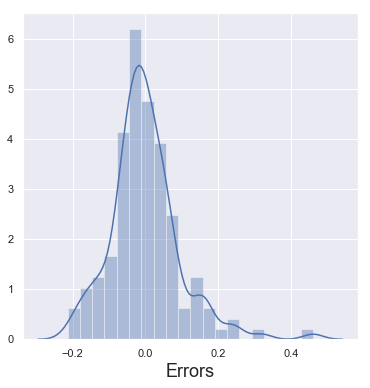

In [184]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=[6,6])
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 33rd model.

In [185]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [186]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,risk,cylinders,diesel,turbo,4-Doors,convertible,hardtop,hatchback,wagon,4wd,rwd,rearEng,dohc,dohcv,l,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.583871,0.232258,0.112903,0.177419,0.564516,0.032258,0.080645,0.338710,0.096774,0.016129,0.419355,0.032258,0.032258,0.0,0.048387,0.048387,0.064516,0.0,0.048387,0.258065,0.0,0.112903,0.016129,0.048387,0.016129
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.271724,0.088288,0.319058,0.385142,0.499868,0.178127,0.274512,0.477134,0.298064,0.127000,0.497482,0.178127,0.178127,0.0,0.216335,0.216335,0.247676,0.0,0.216335,0.441142,0.0,0.319058,0.127000,0.216335,0.127000
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.600000,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.800000,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.750000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,1.000000,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [187]:
y_test = df_test.pop('price')
X_test = df_test

In [188]:
# Adding constant variable to test dataframe
X_test_m33 = sm.add_constant(X_test)

In [189]:
# Creating X_test_m33 dataframe by dropping variables from X_test_m33

X_test_m33 = X_test_m33.drop(["4bbl", "ohcf", "4-Doors", "carlength", "citympg", "idi", "diesel", 
                           "2bbl", "1bbl", "4wd", "dohcv", "compressionratio", "hatchback", 
                           "hardtop", "wagon", "curbweight", "risk", "wheelbase", "spdi", 
                           "rearEng", "turbo", "rotor", "peakrpm", "highwaympg", "carheight", 
                           "convertible", "enginesize", "boreratio", "stroke", "dohc", "l", 
                           "cylinders", "ohcv", "mfi", "spfi"], axis = 1)

In [190]:
# Making predictions using the 33rd model

y_pred_m33 = lr_33.predict(X_test_m33)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

<Figure size 4320x288 with 0 Axes>

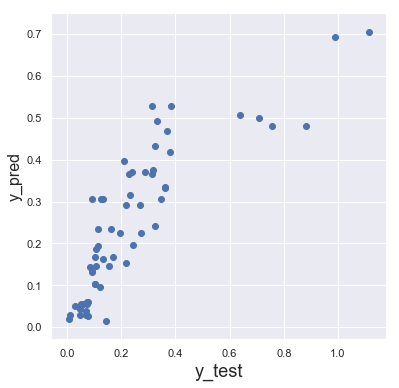

In [191]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.figure(figsize=[6,6])
plt.scatter(y_test, y_pred_m33)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)

In [195]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m33)

0.7096478491161934